In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('wine-clustering.csv',usecols=[0,1,2])
df.head()

,Class,Alcohol,Malic_Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


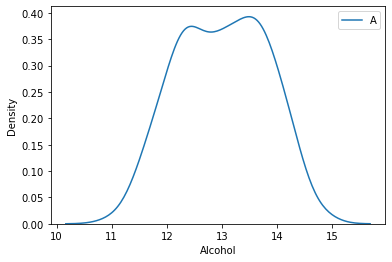

In [3]:
sns.kdeplot(df['Alcohol'])
plt.legend('Alchol')

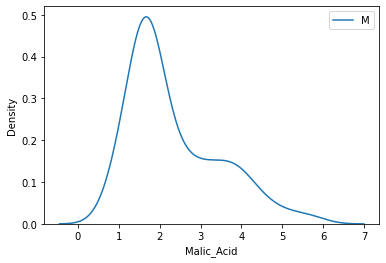

In [4]:
sns.kdeplot(df['Malic_Acid'])
plt.legend('M')

In [5]:
df.shape

(178, 3)

<AxesSubplot:xlabel='Alcohol', ylabel='Malic_Acid'>

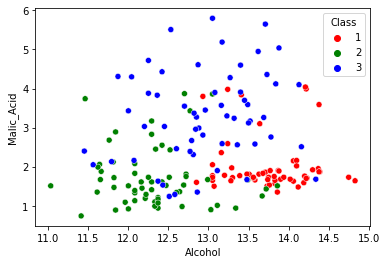

In [6]:
color_dict={1:'red',2:'green',3:'blue'}
sns.scatterplot(df['Alcohol'],df['Malic_Acid'],hue=df['Class'],palette=color_dict)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(df.drop('Class',axis=1),
                                                 df.Class,test_size=.3,random_state=0)

In [8]:
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [9]:
y_train.shape,y_test.shape

((124,), (54,))

In [10]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
# fit the scalar to the train set, it will learn the paramater
scalar.fit(X_train)
# transform train and test sets
X_train_scaled=scalar.transform(X_train)
X_test_scaled=scalar.transform(X_test)

In [11]:
#convert to the dataframe
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [12]:
# before to check the statistic
np.round(X_train.describe(),1)

,Alcohol,Malic_Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [13]:
# after to apply minmax scalar
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic_Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


Text(0.5, 1.0, 'after scaling')

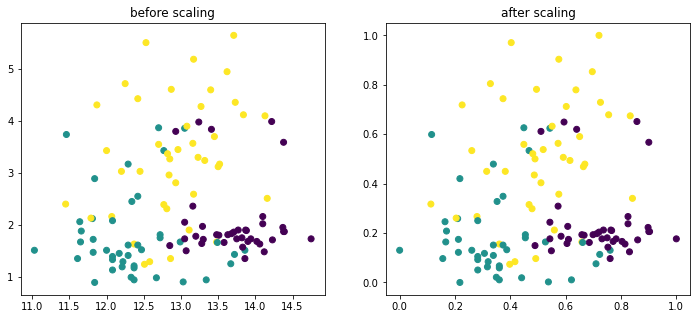

In [14]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Alcohol'],X_train['Malic_Acid'],c=y_train)
ax1.set_title('before scaling')

#after scaling
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic_Acid'],c=y_train)
ax2.set_title('after scaling')

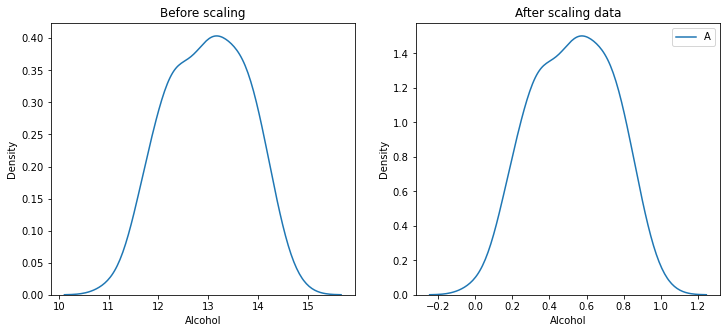

In [15]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(X_train['Alcohol'],ax=ax1)
ax1.set_title('Before scaling')

sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
ax2.set_title('After scaling data')
plt.legend('Alchoal')
plt.show()

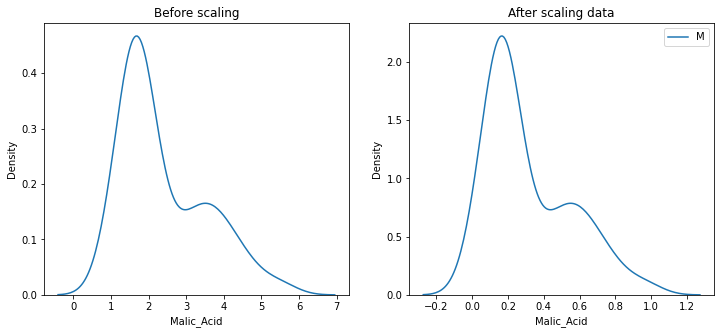

In [16]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(X_train['Malic_Acid'],ax=ax1)
ax1.set_title('Before scaling')

sns.kdeplot(X_train_scaled['Malic_Acid'],ax=ax2)
ax2.set_title('After scaling data')
plt.legend('Malic')
plt.show()

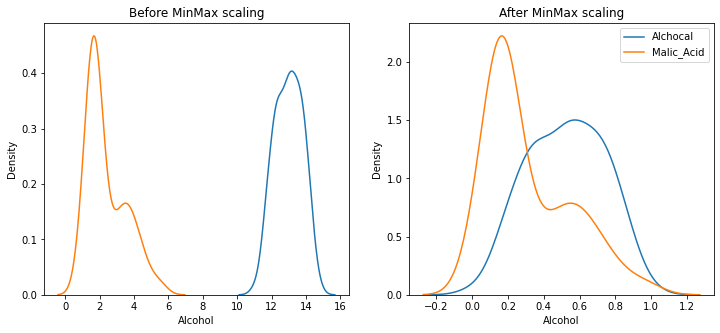

In [17]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
# Before Scaling
ax1.set_title('Before MinMax scaling')
sns.kdeplot(X_train['Alcohol'],ax=ax1,)
sns.kdeplot(X_train['Malic_Acid'],ax=ax1,)

# After Scaling
ax2.set_title('After MinMax scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2,label='Alchocal')
sns.kdeplot(X_train_scaled['Malic_Acid'],ax=ax2,label='Malic_Acid')
plt.legend()

In [18]:
df

,Class,Alcohol,Malic_Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59
